**Exploratory Data Analysis (EDA)**

In [1]:
# Step 1 – Import Libraries and Load Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("retail_sales_dataset.csv")

# Show the first few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Step 2 – Understand the Data Structure

# Get general information about the dataset
df.info()




# # Check for missing values in each column
# print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
# Get summary statistics for numeric columns
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
# Check how often each category appears in a column
# males vs females:
df['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


In [7]:
# For Product Categories:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


In [8]:
# Check for missing values:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


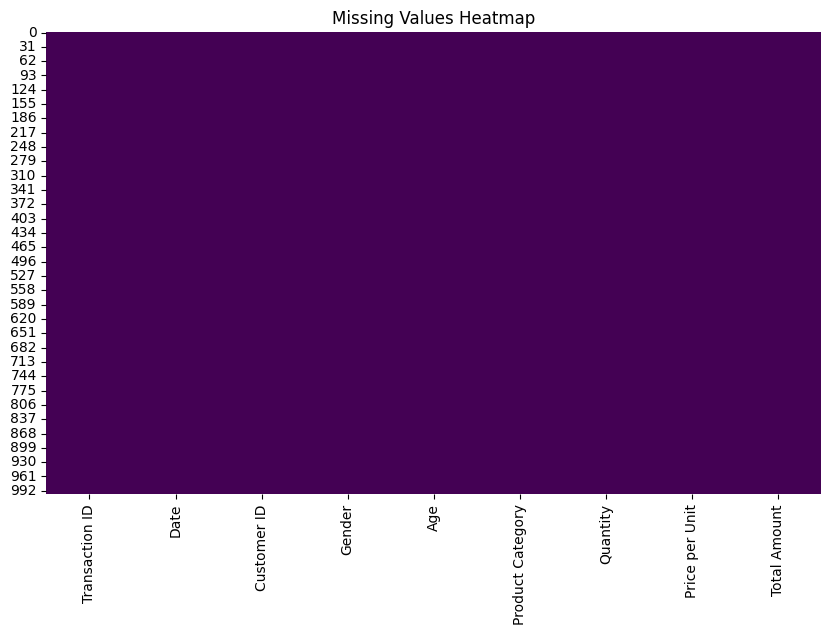

In [9]:
# Step 3 – Explore missing data visually

# Creating a heatmap to quickly see where missing values are present:

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

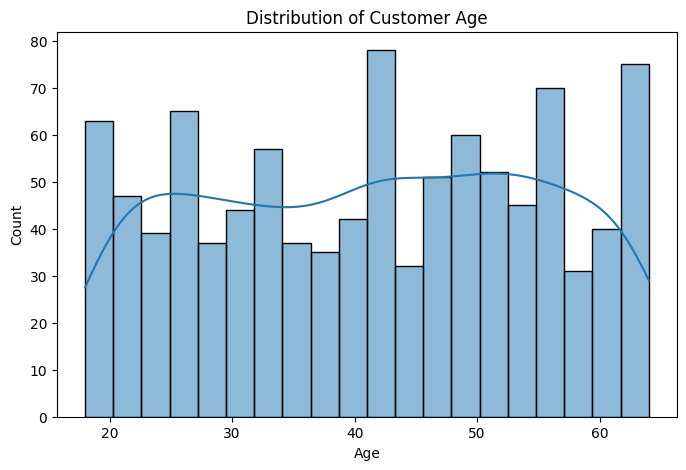

In [10]:
# Step 4 – Explore distributions

# 1. Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

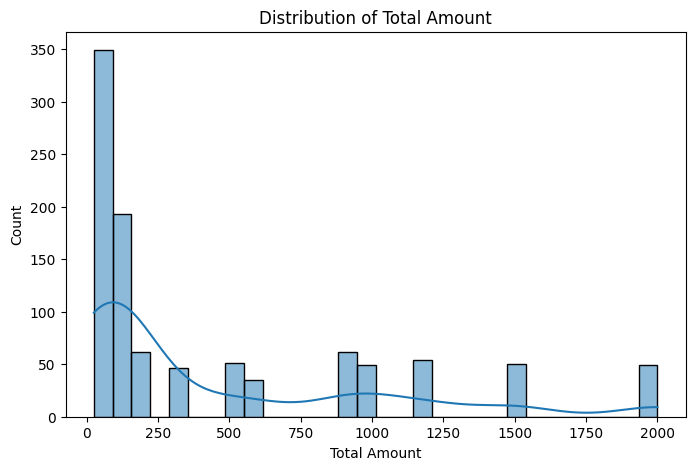

In [11]:
# 2. Distribution of Total Amount
plt.figure(figsize=(8,5))
sns.histplot(df['Total Amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount')
plt.show()

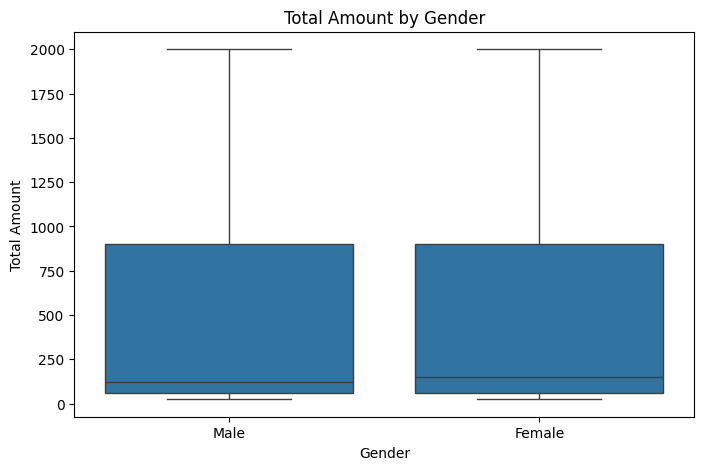

In [12]:
# Step 5 – Explore relationships

# 1. Boxplot of Total Amount by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Total Amount', data=df)
plt.title('Total Amount by Gender')
plt.show()

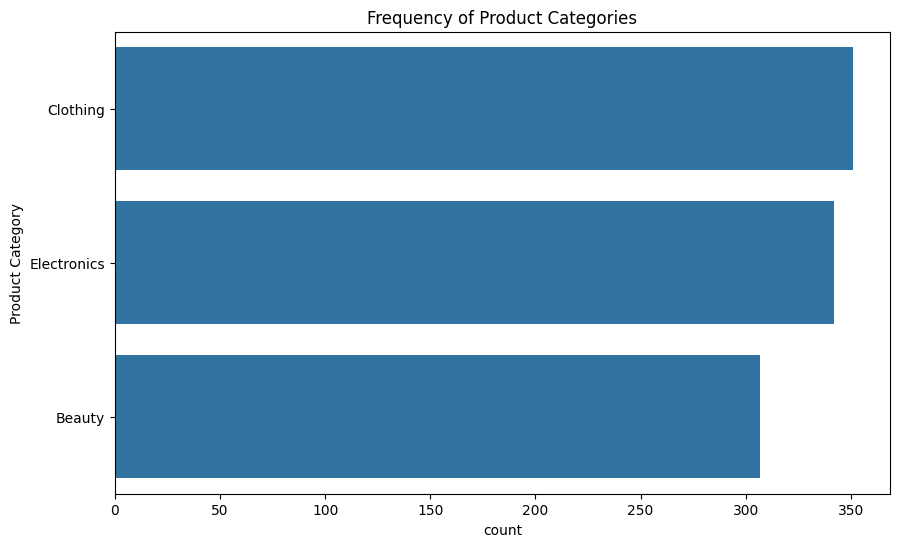

In [13]:
# 2. Countplot of Product Categories
plt.figure(figsize=(10,6))
sns.countplot(y='Product Category', data=df, order=df['Product Category'].value_counts().index)
plt.title('Frequency of Product Categories')
plt.show()

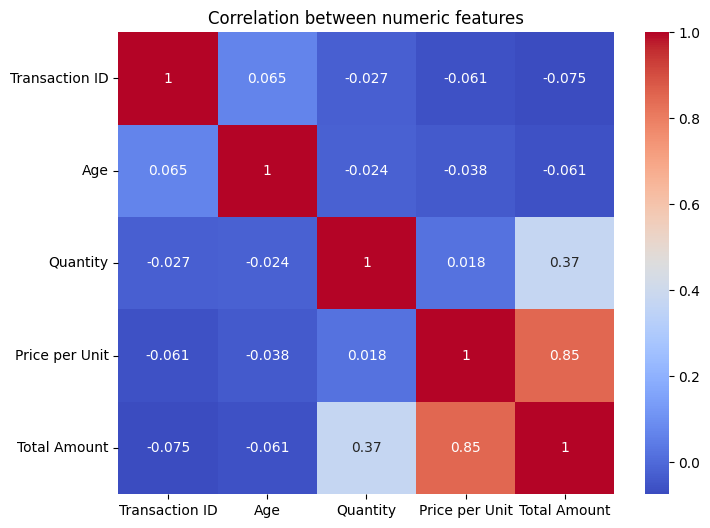

In [16]:
# Step 6 – Correlation heatmap

# Finding numeric columns correlation:

plt.figure(figsize=(8,6))
# Select only numeric columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between numeric features")
plt.show()

In [18]:
# Step 7 – Grouping and aggregation

# Finding total sales per product category:

category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(category_sales)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


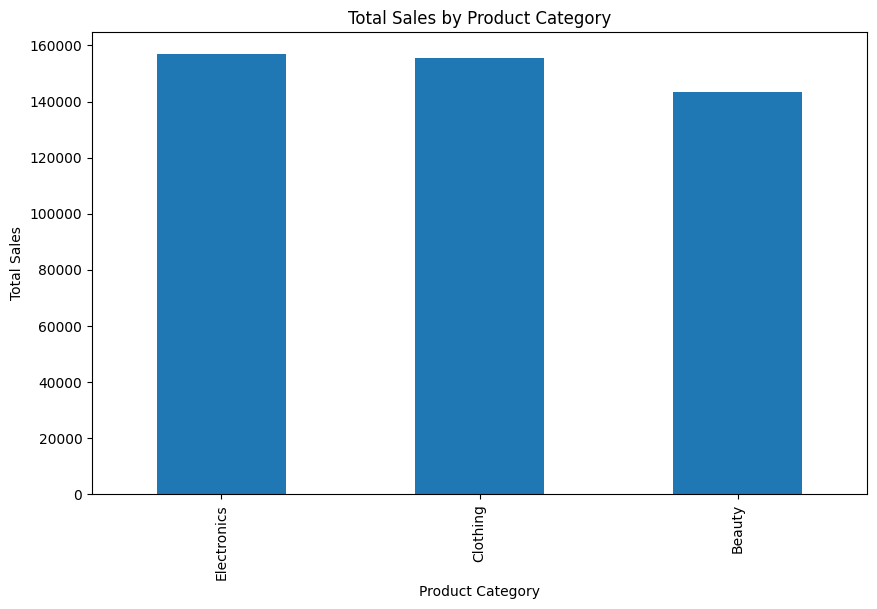

In [19]:
# Plot
category_sales.plot(kind='bar', figsize=(10,6))
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()

In [21]:
# Step 8 – Check for skewness and outliers

# 1. Skewness of Total Amount
print("Skewness of Total Amount:", df['Total Amount'].skew())

Skewness of Total Amount: 1.3761282440171279


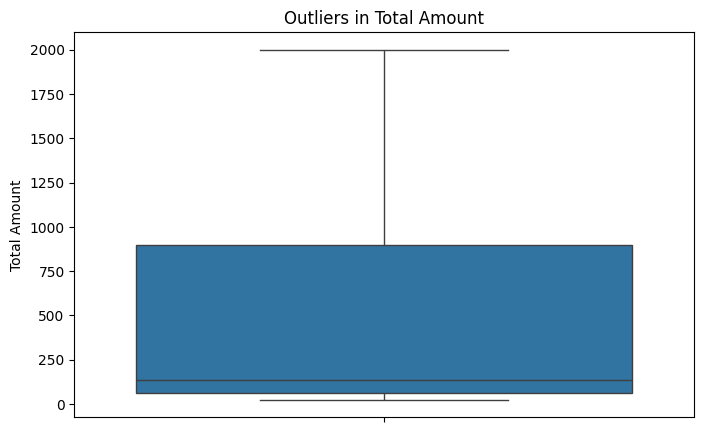

In [22]:
# 2. Boxplot for detecting outliers
plt.figure(figsize=(8,5))
sns.boxplot(df['Total Amount'])
plt.title("Outliers in Total Amount")
plt.show()

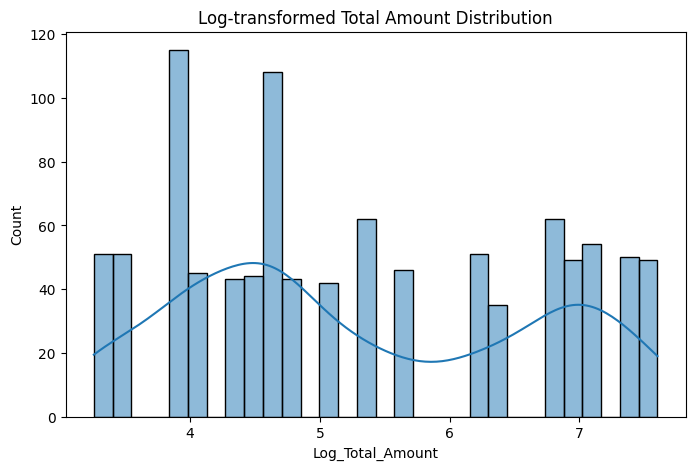

In [23]:
import numpy as np
df['Log_Total_Amount'] = np.log1p(df['Total Amount'])

plt.figure(figsize=(8,5))
sns.histplot(df['Log_Total_Amount'], bins=30, kde=True)
plt.title("Log-transformed Total Amount Distribution")
plt.show()